In [1]:
from scripts.classes import *
from IPython.display import display
import os
os.chdir('..')
print(os.getcwd())


/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0


In [2]:
b_neurons = [
		'AVAR',
		'AVAL',
		'SMDVR',
		'SMDVL',
		'SMDDR',
		'SMDDL',
		'RIBR',
		'RIBL'
	]

worm_num = 0
print(os.getcwd())
data = Database(worm_num, verbose=1)
#exit()
data.exclude_neurons(b_neurons)
#vs = data.loadBundleVisualizer()
vs = data.createVisualizer()


/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0
The dataset 'worm_0' has been loaded successfully.
It has: 109 neurons and 3137 observations
6 neurons have been removed.


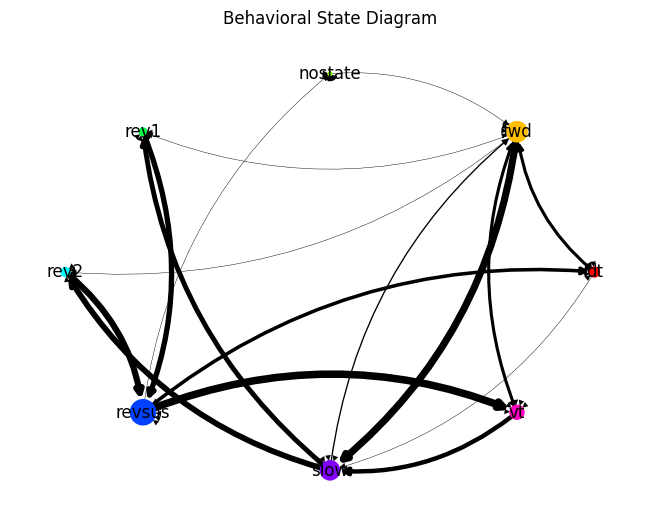

In [3]:
vs.behavioral_state_diagram()

In [4]:
#%matplotlib inline
%matplotlib notebook

movie = vs.make_movie(grid_off=True, interval=20, show_legend=True, quivers=False, save=False)
#vs.save_gif('second_movie')


Try using current latent dimension mapping (tau) for plotting.
No mapping present. CREATING PCA MODEL ...
(3, 3137)


<IPython.core.display.Javascript object>

In [14]:
movie.resume()
print('hie')

hie


In [19]:
data_worm1 = Database(4, verbose=0)
data_worm1.exclude_neurons(b_neurons)
vs1 = data_worm1.createVisualizer()

data_worm2 = Database(2, verbose=0)
data_worm2.exclude_neurons(b_neurons)
vs2 = data_worm2.createVisualizer()

8 neurons have been removed.
8 neurons have been removed.


In [20]:
vs1.attachBundleNet(epochs=500)
_, X1 = preprocess_data(vs1.X.T, vs1.fps)
X1, B1 = prep_data(X1, vs1.B)

print(X1.shape, B1.shape)

print(X1[:,0].shape)
print(vs1.model.tau.input_shape)

transformed_output1 = vs1.model.tau.predict(X1[:,0])
x, y, z = np.hsplit(transformed_output1, 3)

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, s=1, alpha=0.5)
plt.show()

(3006, 2, 15, 121) (3006,)


Losses 0.001668 0.000406 0.002073: 100%|██████████| 500/500 [00:22<00:00, 22.52it/s]


(3006, 2, 15, 121) (3006,)
(3006, 15, 121)
(None, 15, 121)
94/94 [==============================] - 0s 354us/step


<IPython.core.display.Javascript object>

In [8]:
_, X2 = preprocess_data(vs2.X.T, vs2.fps)
X2, B2 = make_windowed_data(X2, vs2.B)
X2 = X2[:,:,:103]
print(X2.shape)
print(B2.shape)
print(bundle_net.tau.input_shape)


transformed_output2 = bundle_net.tau.predict(X2)
x, y, z = np.hsplit(transformed_output2, 3)

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, alpha=0.5)

(3119, 15, 103)
(3119,)
(None, 15, 103)
98/98 [==============================] - 0s 348us/step


<IPython.core.display.Javascript object>

In [8]:
fps_1 = 2.9046296296296297
fps_2 = 2.901851851851852
_, X_test = preprocess_data(vs.X.T)

X_test, B_1 = make_windowed_data(X_test, vs.B)


#win = 16
#X_win = np.zeros((X_test.shape[0] - win + 1, win, X_test.shape[1]))
#for i, _ in enumerate(X_win):
#	X_win[i] = X_test[i:i + win]
#B_1 = vs.B[win - 1:]

#X_test = X_win[:, :-1, :]

[0.00000000e+00 3.44277973e-01 6.88555945e-01 ... 1.07896717e+03
 1.07931144e+03 1.07965572e+03]
(3137,)


In [9]:
print(X_test.shape)
print(B_1.shape)
#X_test = X_test[:100, :, :]
print(bundle_net.tau.input_shape)

(3122, 15, 103)
(3122,)
(None, 15, 103)


In [10]:
transformed_output = bundle_net.tau.predict(X_test)
print(transformed_output.shape)

colordict = dict(zip(np.unique(B_1), generate_equidistant_colors(len(np.unique(B_1)))))
colors = [colordict[val] for val in B_1]

print(B_1.shape)
print(len(colors))


98/98 [==============================] - 0s 371us/step
(3122, 3)
(3122,)
3122


In [11]:
x, y, z = np.hsplit(transformed_output, 3)

In [12]:
#plt.scatter(transformed_output)

#%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, s=1, alpha=0.5, color=colors)

<IPython.core.display.Javascript object>

(100, 20)


/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0/venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


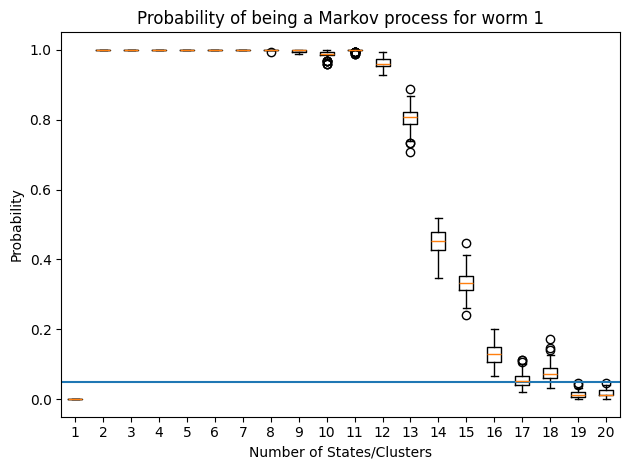

(100, 20)


/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0/venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


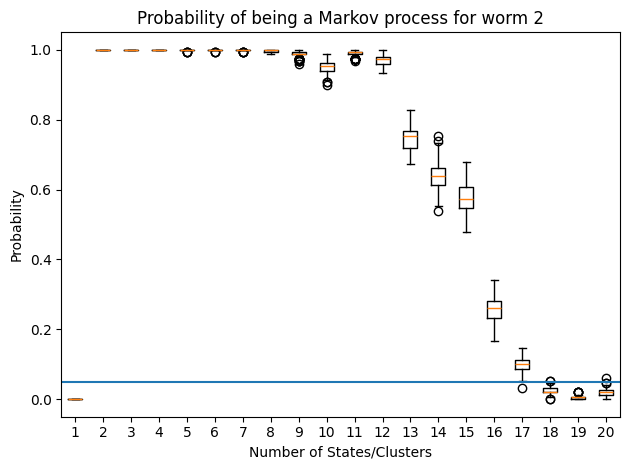

/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0/venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


(100, 20)


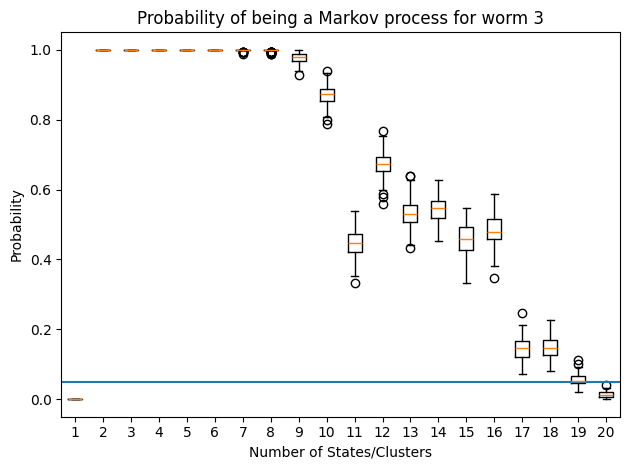

/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0/venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


(100, 20)


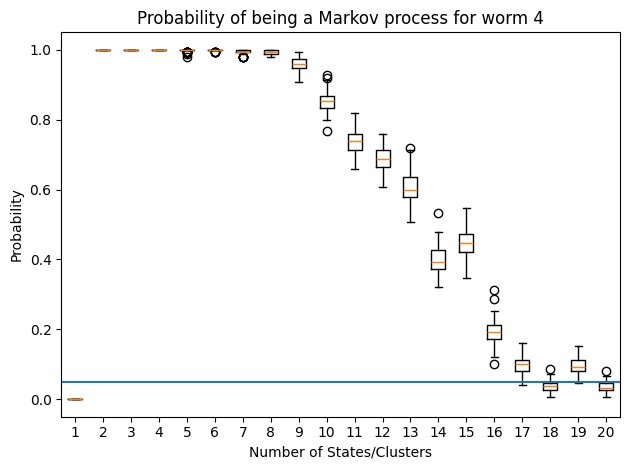

/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0/venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


(100, 20)


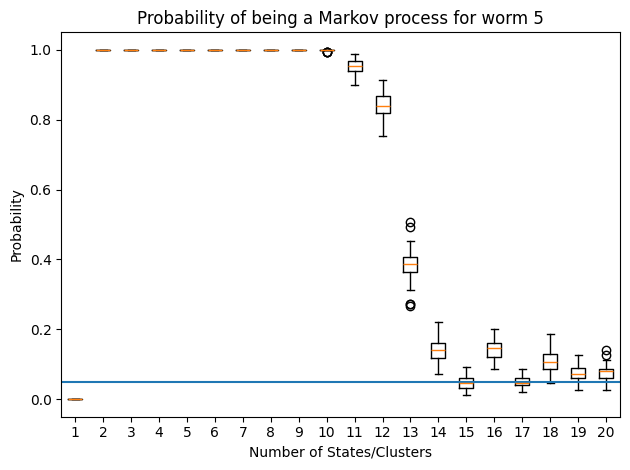

(5, 20)


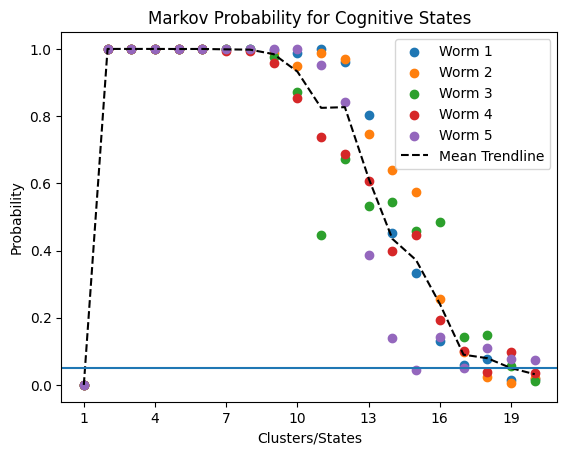

In [3]:
import pickle
### AVERAGE MARKOV PLOT ###

data = []
for i in range(5):
	with open(f'data/pickles/data_worm_{i + 1}.pkl', 'rb') as file:
		loaded_data = pickle.load(file)
		data.append(loaded_data.p_markov)
		loaded_data.plot_markov()

data = np.asarray(data)
data = data.mean(axis=2)
print(data.shape)
average_markov_plot(data)

/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0
The dataset 'worm_0' has been loaded successfully.
It has: 109 neurons and 3137 observations
6 neurons have been removed.
Accuracy: 0.8769525023908192
Probability map has shape: (3137, 8)
normal (3137, 8)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - re

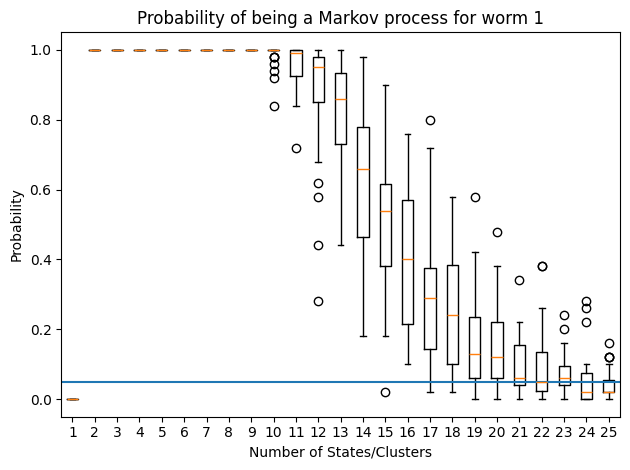

Accuracy: 0.8979917118265859
Probability map has shape: (3137, 8)
normal (3137, 8)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testing markovianity - repetition  22
Testing markovianity - repetition  23
Testing markovianity - repetition  24
Testing markov

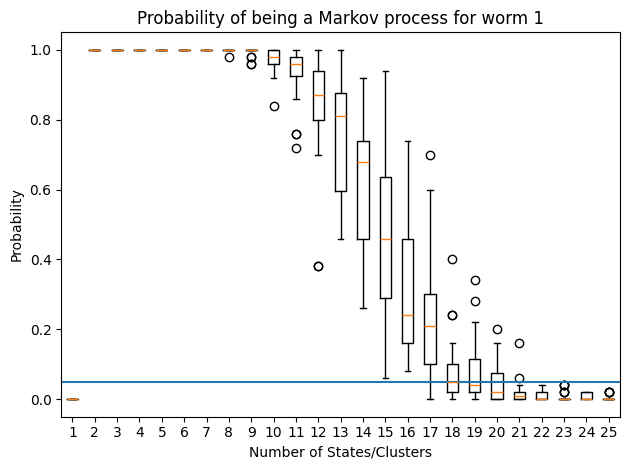

The dataset 'worm_1' has been loaded successfully.
It has: 135 neurons and 3134 observations
8 neurons have been removed.
Accuracy: 0.8819400127632419
Probability map has shape: (3134, 8)
normal (3134, 8)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testin

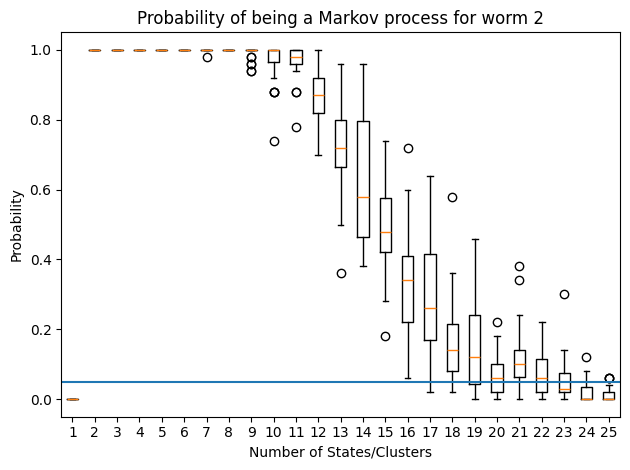

Accuracy: 0.9010848755583918
Probability map has shape: (3134, 8)
normal (3134, 8)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testing markovianity - repetition  22
Testing markovianity - repetition  23
Testing markovianity - repetition  24
Testing markov

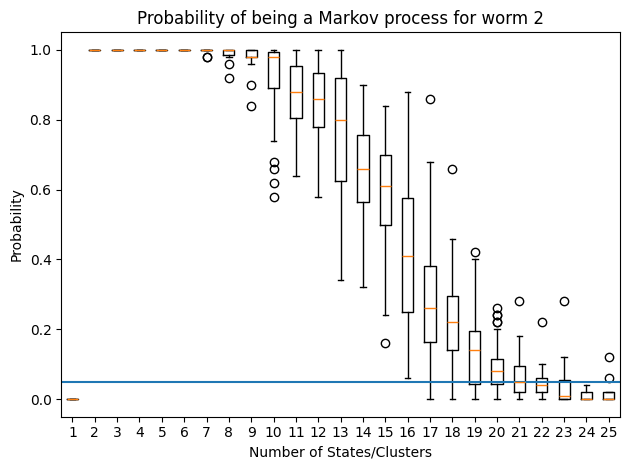

The dataset 'worm_2' has been loaded successfully.
It has: 131 neurons and 3059 observations
8 neurons have been removed.
Accuracy: 0.9136972866949984
Probability map has shape: (3059, 8)
normal (3059, 8)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testin

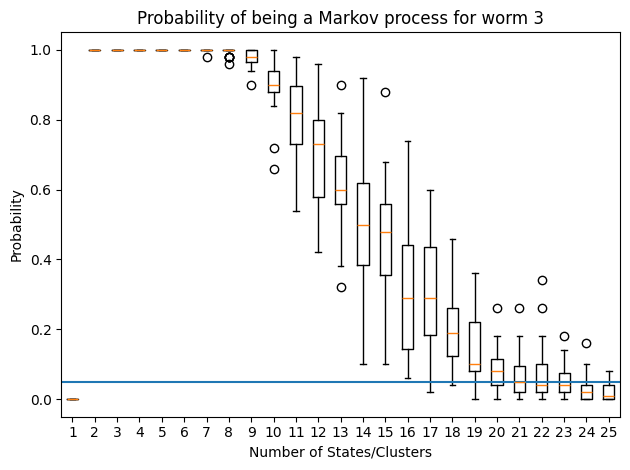

Accuracy: 0.9297155933311539
Probability map has shape: (3059, 8)
normal (3059, 8)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testing markovianity - repetition  22
Testing markovianity - repetition  23
Testing markovianity - repetition  24
Testing markov

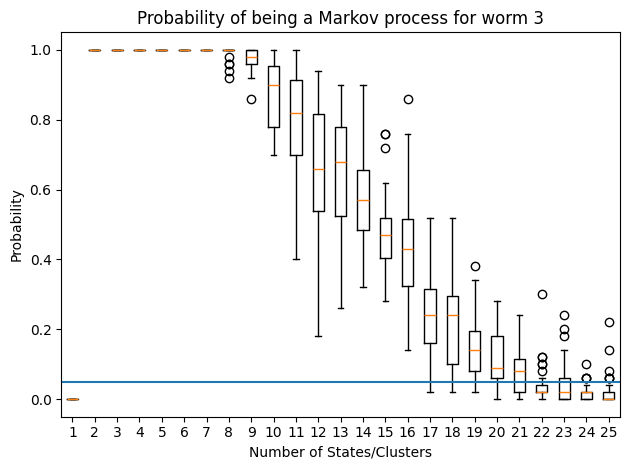

The dataset 'worm_3' has been loaded successfully.
It has: 125 neurons and 3311 observations
6 neurons have been removed.
Accuracy: 0.932648746602235
Probability map has shape: (3311, 8)
normal (3311, 8)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testing

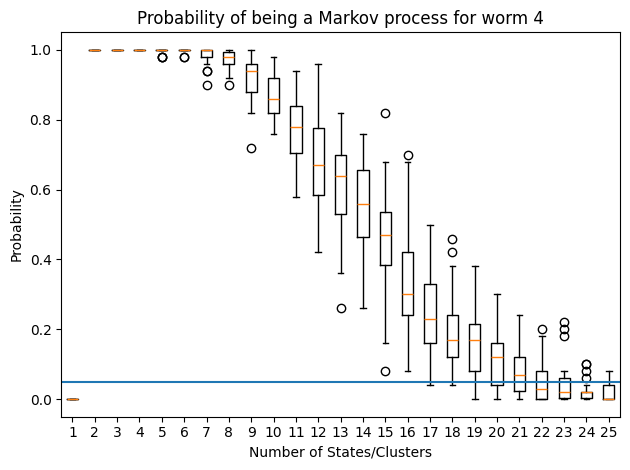

Accuracy: 0.9447296889157354
Probability map has shape: (3311, 8)
normal (3311, 8)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testing markovianity - repetition  22
Testing markovianity - repetition  23
Testing markovianity - repetition  24
Testing markov

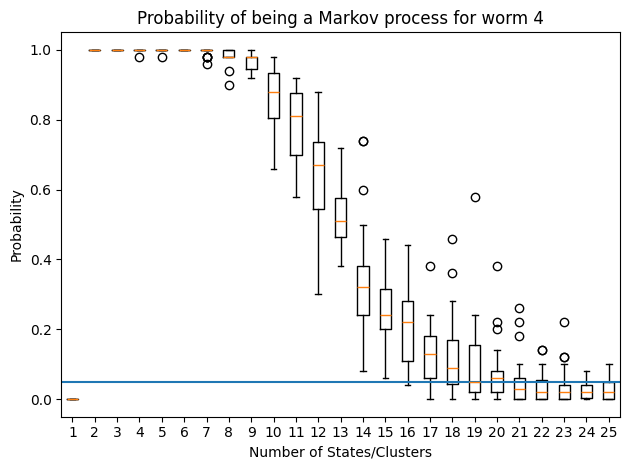

The dataset 'worm_4' has been loaded successfully.
It has: 129 neurons and 3021 observations
8 neurons have been removed.
Accuracy: 0.887785501489573
Probability map has shape: (3021, 8)
normal (3021, 8)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testing

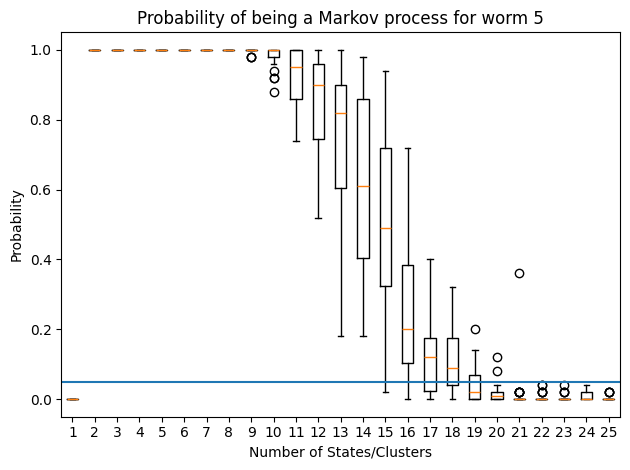

Accuracy: 0.9116186693147964
Probability map has shape: (3021, 8)
normal (3021, 8)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testing markovianity - repetition  22
Testing markovianity - repetition  23
Testing markovianity - repetition  24
Testing markov

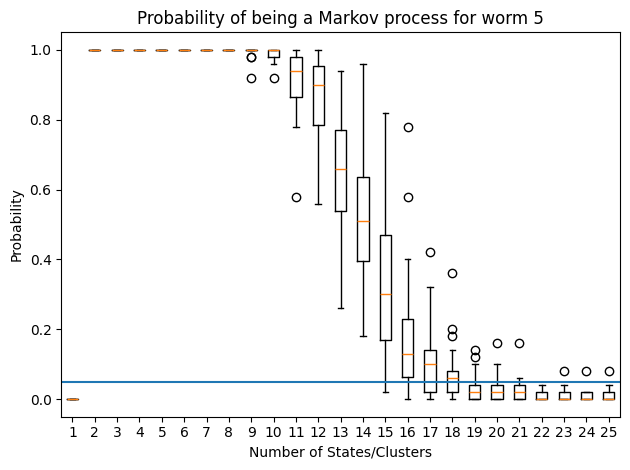

In [1]:
from scripts.classes import *
import os
os.chdir('..')
print(os.getcwd())### 28 dimension Model ###
# Assuming 'A' and 'B' are encoded as strings in your 'Y' variable
b_neurons = [
		'AVAR',
		'AVAL',
		'SMDVR',
		'SMDVL',
		'SMDDR',
		'SMDDL',
		'RIBR',
		'RIBL'
	]

for worm_num in range(5):
#worm_num = 1
	data = Database(worm_num, verbose=1)
	data.exclude_neurons(b_neurons)
	
	# testing mapping
	#logreg = LogisticRegression(solver='liblinear', max_iter=1000)
	#data.fit_28_model(logreg, markov_test=True, nrep=10, sim_markov=30, max_clusters=25)
	#data.plot_markov()
	
	#
	logreg = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
	data.fit_model(logreg, markov_test=True, nrep=30, sim_markov=50, max_clusters=25)
	data.plot_markov()
	logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
	data.fit_model(logreg, markov_test=True, nrep=30, sim_markov=50, max_clusters=25)
	data.plot_markov()

Accuracy: 0.9010848755583918
Probability map has shape: (3134, 8)
normal (3134, 8)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testing markovianity - repetition  22
Testing markovianity - repetition  23
Testing markovianity - repetition  24
Testing markov

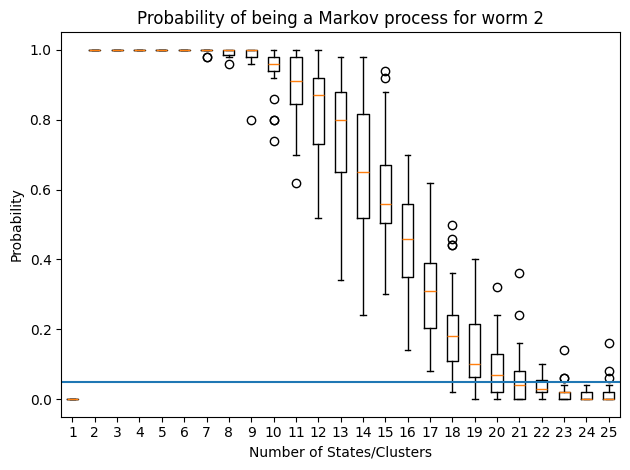

In [2]:
# Assuming 'A' and 'B' are encoded as strings in your 'Y' variable

#
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
data.fit_model(logreg, markov_test=True, nrep=30, sim_markov=50, max_clusters=25)
data.plot_markov()